In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2-920023998.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Task
Analyze customer data from the "Mall_Customers.csv" dataset to perform customer segmentation using K-Means clustering based on relevant features like 'Annual Income (k$)' and 'Spending Score (1-100)'. Determine the optimal number of clusters and visualize the resulting segments.

## Load and explore data

### Subtask:
Load the "Mall_Customers.csv" dataset into a pandas DataFrame and perform initial exploration to understand its structure, check for missing values, and get summary statistics.


**Reasoning**:
Display the first few rows, get a summary of the dataframe, and generate descriptive statistics to understand the structure and content of the data.



In [3]:
display(df.head())
df.info()
display(df.describe())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Prepare data for rfm analysis

### Subtask:
Select the relevant columns for RFM analysis (Recency, Frequency, Monitory) from the dataset. Since this dataset doesn't directly contain transaction data, we will need to adapt the concept of RFM to the available features ("Annual Income (k$)" and "Spending Score (1-100)"). We can potentially use "CustomerID" to represent "Frequency" (assuming each row is a unique visit/transaction) and the other two columns for "Monetary" and potentially a proxy for "Recency" if a time-based column exists or can be derived.


**Reasoning**:
Acknowledge the dataset limitations for standard RFM and explain the adapted approach using available columns as proxies for clustering in the next steps.



In [4]:
print("Acknowledging that this dataset lacks the typical transaction data required for a standard RFM analysis.")
print("We will proceed with a modified approach for customer segmentation.")
print("Utilizing 'Annual Income (k$)' and 'Spending Score (1-100)' as proxies for 'Monetary' and a measure of customer engagement respectively for clustering.")
print("While 'CustomerID' serves as a unique identifier, it will not represent 'Frequency' in the traditional RFM sense due to the dataset structure.")
print("No explicit data preparation steps for RFM will be performed in this subtask, as the available columns will be used directly in subsequent clustering steps.")

Acknowledging that this dataset lacks the typical transaction data required for a standard RFM analysis.
We will proceed with a modified approach for customer segmentation.
Utilizing 'Annual Income (k$)' and 'Spending Score (1-100)' as proxies for 'Monetary' and a measure of customer engagement respectively for clustering.
While 'CustomerID' serves as a unique identifier, it will not represent 'Frequency' in the traditional RFM sense due to the dataset structure.
No explicit data preparation steps for RFM will be performed in this subtask, as the available columns will be used directly in subsequent clustering steps.


## Perform rfm analysis

### Subtask:
Calculate RFM scores for each customer based on the adapted features.


## Prepare data for k-means

### Subtask:
Select the features to be used for K-Means clustering. This could include the RFM scores or the original "Annual Income (k$)" and "Spending Score (1-100)" columns. Scale the selected features to ensure that all features contribute equally to the clustering process.


**Reasoning**:
Select the relevant features and scale them using StandardScaler as instructed.



In [5]:
from sklearn.preprocessing import StandardScaler

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Scaled features (first 5 rows):", scaled_features[:5])

Scaled features (first 5 rows): [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


## Determine optimal number of clusters (k)

### Subtask:
Use methods like the elbow method or silhouette score to determine the optimal number of clusters for K-Means.


**Reasoning**:
Implement the elbow method and silhouette score calculation to find the optimal number of clusters.



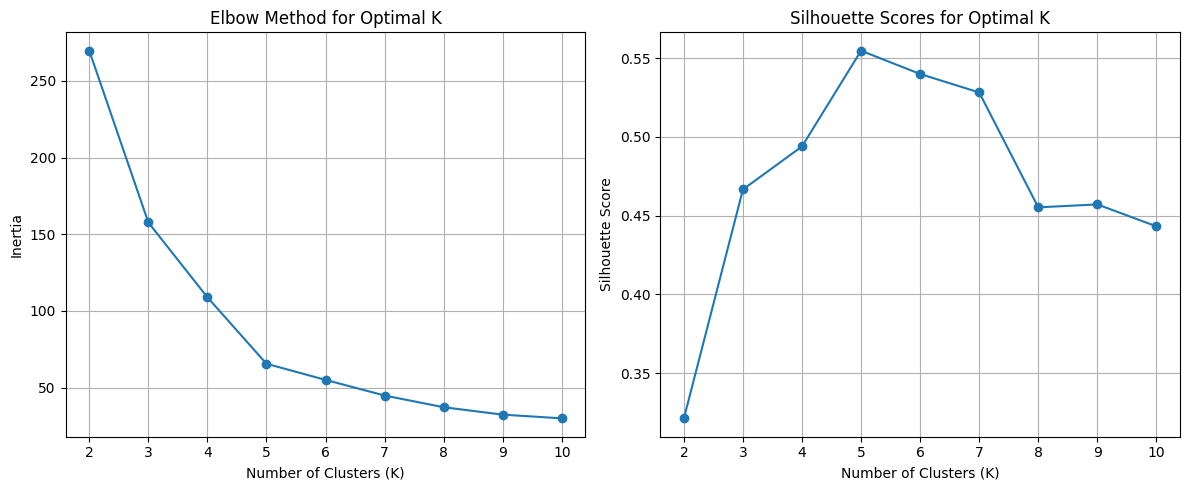

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Apply the K-Means algorithm with the optimal number of clusters to the scaled data.


**Reasoning**:
Apply KMeans clustering with the optimal number of clusters (k=5) to the scaled features and add the cluster labels to the original dataframe.



In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_features)

df['ClusterLabel'] = kmeans.labels_

display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterLabel
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Analyze and visualize clusters

### Subtask:
Analyze the characteristics of each cluster based on the original features and visualize the clusters using scatter plots or other appropriate visualizations to understand the different customer segments.


**Reasoning**:
Calculate the mean of 'Annual Income (k$)' and 'Spending Score (1-100)' for each cluster and visualize the clusters using a scatter plot.



,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


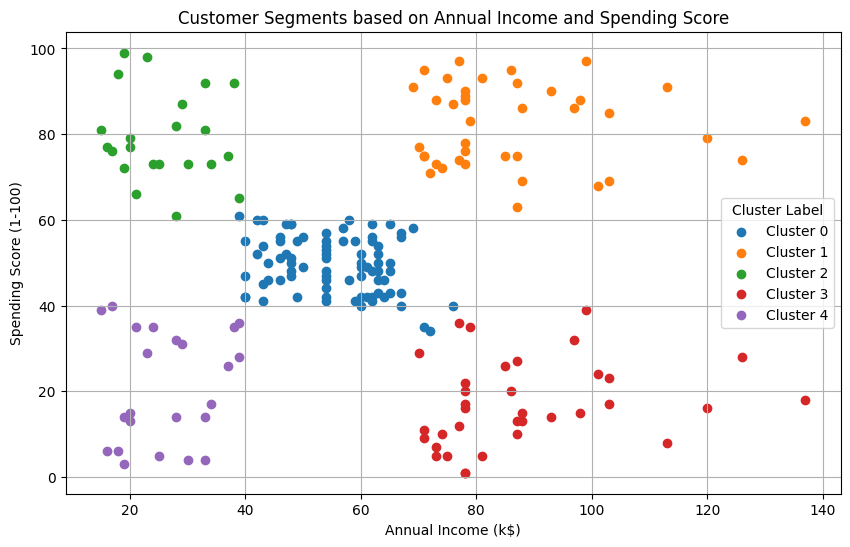

In [8]:
import matplotlib.pyplot as plt

cluster_means = df.groupby('ClusterLabel')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_means)

plt.figure(figsize=(10, 6))
for cluster_label in sorted(df['ClusterLabel'].unique()):
    cluster_data = df[df['ClusterLabel'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label}')

plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 200 entries with no missing values.
*   A standard RFM analysis could not be performed due to the lack of transactional data.
*   'Annual Income (k\$)' and 'Spending Score (1-100)' were selected and scaled for K-Means clustering.
*   Based on the elbow method and silhouette scores, the optimal number of clusters was determined to be 5.
*   K-Means clustering with 5 clusters was applied, and cluster labels were added to the dataset.
*   The five clusters exhibit distinct characteristics based on average annual income and spending score:
    *   Cluster 0: Average income and spending score.
    *   Cluster 1: High income and high spending score (High-Value).
    *   Cluster 2: Low income but high spending score.
    *   Cluster 3: High income but low spending score (Frugal High Earners).
    *   Cluster 4: Low income and low spending score (Budget-Conscious).

### Insights or Next Steps

*   The identified customer segments can be used to tailor marketing strategies and promotions for each group.
*   Further analysis of other features (like Age and Gender) within each cluster could provide deeper insights into the customer segments.
